In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as np
import zipfile

In [8]:
salary = "./ds_salaries.csv"
df = pd.read_csv(salary)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [37]:
#Count of unique values
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [9]:
#Null Values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Work_Year Analysis

In [20]:
#Work_Year Counts
wy = df["work_year"].value_counts()
wy

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

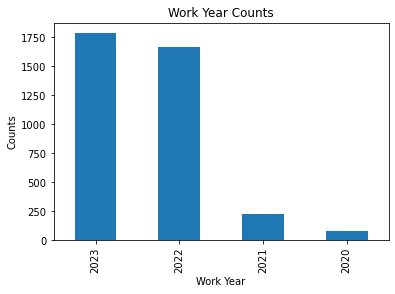

In [35]:
#Plotting Work Year (Univariate Plot)
fig, ax = plt.subplots()
bars = wy.plot(kind="bar", title = "Work Year Counts")
ax.set_xlabel('Work Year')
ax.set_ylabel('Counts')
plt.show()

## Experience Level vs Number of Job Listings

In [57]:
#Experience_Level Counts
exp = df["experience_level"].value_counts()
exp

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

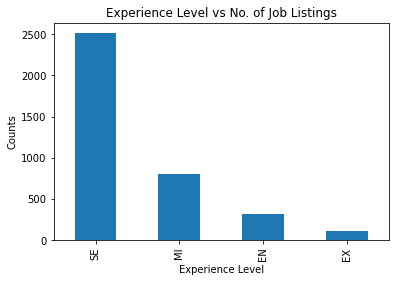

In [60]:
#Plotting Experience Level vs Number of Job Listings
fig, ax = plt.subplots()
bars = exp.plot(kind="bar", title = "Experience Level vs No. of Job Listings")
ax.set_xlabel('Experience Level')
ax.set_ylabel('Job Listings')
plt.show()

## Employment Level vs Number of Job Listings

In [61]:
#Employment_Type Counts
employment = df["employment_type"].value_counts()
employment

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

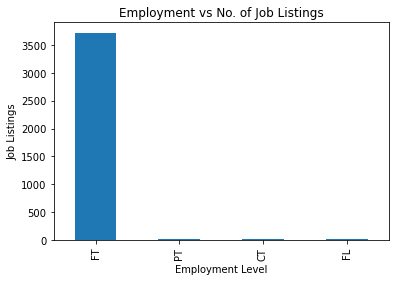

In [63]:
#Plotting Employment Level vs Number of Job Listings
fig, ax = plt.subplots()
bars = employment.plot(kind="bar", title = "Employment vs No. of Job Listings")
ax.set_xlabel('Employment Level')
ax.set_ylabel('Job Listings')
plt.show()

## Job Title vs Salary

In [36]:
##Job Title Grouped Data
jts = df.groupby(["job_title"]).mean().reset_index()
jts  

,job_title,work_year,salary,salary_in_usd,remote_ratio
0,3D Computer Vision Researcher,2021.500000,120000.000000,21352.250000,50.000000
1,AI Developer,2022.727273,137181.818182,136666.090909,31.818182
2,AI Programmer,2022.500000,55000.000000,55000.000000,50.000000
3,AI Scientist,2021.687500,275312.500000,110120.875000,71.875000
4,Analytics Engineer,2022.446602,151352.621359,152368.631068,54.368932
...,...,...,...,...,...
88,Research Engineer,2022.864865,162752.810811,163108.378378,18.918919
89,Research Scientist,2022.500000,160768.890244,161214.195122,27.439024
90,Software Data Engineer,2023.000000,75000.000000,62510.000000,75.000000
91,Staff Data Analyst,2020.000000,15000.000000,15000.000000,0.000000


ValueError: Boolean array expected for the condition, not object

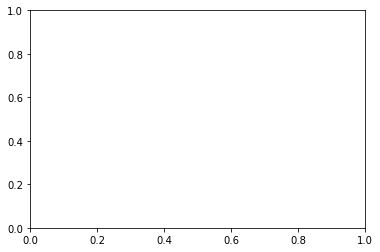

In [42]:
fig, ax = plt.subplots()
bars = job_title.plot(job_title, salary, title = "Job Title vs Salary Counts")
ax.set_xlabel('Work Year')
ax.set_ylabel('Counts')
plt.show()